In [3]:
import base64
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import json
import seaborn as sns
import re
import os

pp = pprint.PrettyPrinter(indent=4)

df_name = 'experiment_results_prolific_pilot_10ps'

In [10]:
remove_negative_gaze = False
# code CJ45HISW
filter_blacklist = True
blacklist = ['j']
df = pd.read_csv(f'data/raw_data/{df_name}.csv')
df = df.drop('type', axis=1)

if filter_blacklist:
    df = df[~df.workerid.isin(blacklist)]

# reindex the df
df.reset_index(drop=True, inplace=True)

def parse(data):
    while data[0] != '{':
        data = data[1:]
    while data[-1] != '}':
        data = data[:-1]
    data = data.replace('\\', '')
    data = re.sub(
        r'(?<=strategy":")(.*)(?="\})',
        lambda m: m.group(0).replace('"', '\\"'),
        data,
        count=1)
    json_data = {}
    try:
        json_data = json.loads(data)
    except:
        pp.pprint(data[-200:])
    return json_data

df = pd.concat([df, pd.json_normalize(df.apply(lambda x: parse(x['answer']), axis=1, ), max_level=0)], axis=1)

if remove_negative_gaze:
    df.gaze = df.gaze.apply(lambda x: {key:val for key, val in json.loads(base64.b64decode(x)).items() if int(key) > 0})
else:
    df.gaze = df.gaze.apply(lambda x: {key:val for key, val in json.loads(base64.b64decode(x)).items() if val['x'] is not None})
df.sort_values(by=['workerid', 'userTrialId'], inplace=True)
df.reset_index(drop=True, inplace=True)
df['deviceInfo'] = df['deviceInfo'].ffill()
df.columns

Index(['filename', 'listnumber', 'assignmentid', 'hitid', 'workerid', 'origin',
       'timestamp', 'partid', 'questionid', 'answer', 'trialid', 'sentmsg',
       'trgt', 'comp', 'dist', 'msg1', 'msg2', 'msg3', 'msg4', 'id',
       'sent_msg', 'objs', 'trgtPos', 'compPos', 'distPos', 'type',
       'msgsOrder', 'userTrialId', 'answerTime', 'choicePos', 'choice',
       'coordinates', 'gaze', 'correct', 'deviceInfo', 'calibrationPrecision',
       'techDiffs', 'otherComments', 'strategy'],
      dtype='object')

In [11]:
for id in df['workerid'].unique():
    print(f'{id}, ')

5ed367525fe8eb2fa817b9c1, 
6037919c2b5de32d6ebaee90, 
60bf706fc3b12a3c4f11a487, 
661e75b62240d5ad7b18a9a6, 
665d5a08c8e61c18498d08c9, 
66855ff6755a311dada39b28, 
671a528fe9658f0a32bd55ce, 
676700ebaf4a1fdf1868d7c6, 
676942464fe51377822349c7, 
677dc096791809f5e6c196a9, 


In [12]:
df

,filename,listnumber,assignmentid,hitid,workerid,origin,timestamp,partid,questionid,answer,...,choicePos,choice,coordinates,gaze,correct,deviceInfo,calibrationPrecision,techDiffs,otherComments,strategy
0,inputdata.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,5ed367525fe8eb2fa817b9c1,PROLIFIC,04-Mar-2025 17:30:49,13990,343578,"""{\""sent_msg\"":\""tr\"",\""objs\"":[\""tr_bl\"",\""sq...",...,0,tr_bl,"{'sent_msg': {'x': 1024, 'y': 124, 'width': 10...","{'31172': {'x': 1612, 'y': 511, 'eyes': {'left...",1,"{'screen': '1920 x 1080', 'browser': 'Chrome',...","[88, 69, 72]",Calibration kept failing and took a while to c...,NaN,NaN
1,inputdata.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,5ed367525fe8eb2fa817b9c1,PROLIFIC,04-Mar-2025 17:30:49,13990,343573,"""{\""sent_msg\"":\""re\"",\""objs\"":[\""sq_re\"",\""tr...",...,0,sq_re,"{'sent_msg': {'x': 1024, 'y': 124, 'width': 10...","{'31183': {'x': 796, 'y': 71, 'eyes': {'left':...",1,"{'screen': '1920 x 1080', 'browser': 'Chrome',...",NaN,NaN,NaN,NaN
2,inputdata.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,5ed367525fe8eb2fa817b9c1,PROLIFIC,04-Mar-2025 17:30:49,13990,343602,"""{\""sent_msg\"":\""tr\"",\""objs\"":[\""tr_re\"",\""ci...",...,0,tr_re,"{'sent_msg': {'x': 1024, 'y': 124, 'width': 10...","{'31182': {'x': 930, 'y': -189, 'eyes': {'left...",1,"{'screen': '1920 x 1080', 'browser': 'Chrome',...",NaN,NaN,NaN,NaN
3,inputdata.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,5ed367525fe8eb2fa817b9c1,PROLIFIC,04-Mar-2025 17:30:49,13990,343591,"""{\""sent_msg\"":\""bl\"",\""objs\"":[\""ci_re\"",\""tr...",...,2,ci_bl,"{'sent_msg': {'x': 1024, 'y': 124, 'width': 10...","{'31139': {'x': 796, 'y': 10, 'eyes': {'left':...",1,"{'screen': '1920 x 1080', 'browser': 'Chrome',...",NaN,NaN,NaN,NaN
4,inputdata.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,5ed367525fe8eb2fa817b9c1,PROLIFIC,04-Mar-2025 17:30:49,13990,343580,"""{\""sent_msg\"":\""tr\"",\""objs\"":[\""ci_re\"",\""tr...",...,1,tr_bl,"{'sent_msg': {'x': 1024, 'y': 124, 'width': 10...","{'31173': {'x': 675, 'y': 585, 'eyes': {'left'...",1,"{'screen': '1920 x 1080', 'browser': 'Chrome',...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,inputdata.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,677dc096791809f5e6c196a9,PROLIFIC,04-Mar-2025 18:18:39,13990,343602,"""{\""sent_msg\"":\""tr\"",\""objs\"":[\""ci_re\"",\""tr...",...,1,tr_re,"{'sent_msg': {'x': 654, 'y': 113, 'width': 100...","{'21795': {'x': 742, 'y': 65, 'eyes': {'left':...",1,"{'screen': '1536 x 864', 'browser': 'Chrome', ...",NaN,NaN,NaN,NaN
376,inputdata.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,677dc096791809f5e6c196a9,PROLIFIC,04-Mar-2025 18:18:39,13990,343593,"""{\""sent_msg\"":\""bl\"",\""objs\"":[\""sq_bl\"",\""tr...",...,1,tr_bl,"{'sent_msg': {'x': 654, 'y': 113, 'width': 100...","{'21815': {'x': 696, 'y': 137, 'eyes': {'left'...",0,"{'screen': '1536 x 864', 'browser': 'Chrome', ...",NaN,NaN,NaN,NaN
377,inputdata.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,677dc096791809f5e6c196a9,PROLIFIC,04-Mar-2025 18:18:39,13990,343580,"""{\""sent_msg\"":\""tr\"",\""objs\"":[\""ci_re\"",\""tr...",...,1,tr_bl,"{'sent_msg': {'x': 654, 'y': 113, 'width': 100...","{'21814': {'x': 673, 'y': 120, 'eyes': {'left'...",1,"{'screen': '1536 x 864', 'browser': 'Chrome', ...",NaN,NaN,NaN,NaN
378,inputdata.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,677dc096791809f5e6c196a9,PROLIFIC,04-Mar-2025 18:18:39,13990,343606,"""{\""sent_msg\"":\""ci\"",\""objs\"":[\""ci_gr\"",\""ci...",...,1,ci_bl,"{'sent_msg': {'x': 654, 'y': 113, 'width': 100...","{'21814': {'x': 673, 'y': 120, 'eyes': {'left'...",1,"{'screen': '1536 x 864', 'browser': 'Chrome', ...",NaN,NaN,NaN,Because there is not option to choose blue so ...


### Convert Gaze to Fixation detection format
#### After consideration, fixation detection does not seem like a good choice for our data

In [13]:
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# for participant in df['workerid'].unique():
#     participant_df = df[df['workerid'] == participant]
#     participant_df.reset_index(drop=True, inplace=True)
#     x = participant_df['gaze'].apply(lambda gaze: [gaze[key]['x'] for key in gaze.keys()])
#     y = participant_df['gaze'].apply(lambda gaze: [gaze[key]['y'] for key in gaze.keys()])
#     time = participant_df['gaze'].apply(lambda gaze: [int(key) for key in gaze.keys()])
#     # shift all values to remove negative values
#     time = time.apply(lambda x: [i - min(x) for i in x])
#     prep_df = pd.DataFrame({'trial': participant_df['userTrialId'],'x': x, 'y': y, 'time': time})
#     prep_df = prep_df.explode(['x','y','time'])
#     prep_df.sort_values(by=['trial', 'time'], inplace=True)
#     prep_df.to_csv(f'data/participants_raw_gaze/{participant}.csv', index=False)

# import subprocess
# subprocess.call("/usr/bin/Rscript --vanilla ~/uds/thesis/Thesis-Project/analysis/fixations.r", shell=True)

# for participant in df['workerid'].unique():
#     participant_fixations = pd.read_csv(f'data/participants_fixations/{participant}.csv')

#     fixations = participant_fixations.groupby('trial').apply(lambda x: x.to_dict(orient='records')).to_dict()
#     print(fixations)
#     df.loc[df['workerid'] == participant, 'fixations'] = df[df['workerid'] == participant]['userTrialId'].apply(lambda x: fixations[x] if x in fixations else [])
    

## Gen Features

In [14]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

df['meanAnswerTime'] = df.groupby('workerid')['answerTime'].transform('mean')
df['answerAccuracy'] = df.groupby('workerid')['correct'].transform('mean')
df['answerAccuracySimple'] = df[df['type'].isin(['simple','strategy_simple'])].groupby('workerid')['correct'].transform('mean')
df['answerAccuracyComplex'] = df[df['type'].isin(['complex', 'strategy_complex'])].groupby('workerid')['correct'].transform('mean')
df['answerAccuracyUnambiguous'] = df[df['type'] == 'unambiguous'].groupby('workerid')['correct'].transform('mean')
df['resolution'] = df.deviceInfo.apply(lambda x: [int(size) for size in x['screen'].split('x')])

def compute_polygon(polygon_type, coords):
    x12 = (coords['img1']['x'] + coords['img1']['width'] + coords['img2']['x'])/2
    x23 = (coords['img2']['x'] + coords['img2']['width'] + coords['img3']['x'])/2
    y12 = (coords['sent_msg']['y'] + coords['sent_msg']['height'] + coords['img1']['y'])/2
    y23 = (coords['img1']['y'] + coords['img1']['height'] + coords['available_msgs']['y'])/2
    match polygon_type:
        case 'sent_msg':
            return Polygon([(x23+x12/2, 0), (x12/2, 0), (x12, y12), (x23, y12)])
        case 'img1':
            return Polygon([(0, y12/2), (x12, y12), (x12, y23), (0, y23+y12/2)])
        case 'img2':
            return Polygon([(x12, y12), (x23, y12), (x23, y23), (x12, y23)])
        case 'img3':
            return Polygon([(x23, y12), (x12+x23, y12/2), (x12+x23, y23+y12/2), (x23, y23)])
        case 'available_msgs':
            return Polygon([(x12, y23), (x23, y23), (x23+x12/2, y12+y23), (x12/2, y12+y23)])


def count_gaze(gaze, polygon, participant=None):
    count = 0
    # check if there is gaze is not empty
    if not gaze:
        return 0
    for _, val in gaze.items():
        point = Point(val['x'], val['y'])
        if polygon.contains(point):
            count += 1
    return count

def merge_msgs_coords(coords):
    coords['available_msgs'] = {'height': coords['msg1']['height'], 'width': coords['msg4']['x'] + coords['msg4']['width'] - coords['msg1']['x'], 'x': coords['msg1']['x'], 'y': coords['msg1']['y']}
    return coords

df['coordinates'] = df.apply(lambda x: merge_msgs_coords(x['coordinates']), axis=1)
df['timeOnSentMsg'] = df.apply(lambda x: count_gaze(x['gaze'], compute_polygon('sent_msg', x['coordinates']), x['workerid']), axis=1) 
df['timeOnSentMsgSimple'] = df[df['type'].isin(['simple','strategy_simple'])].apply(lambda x: x['timeOnSentMsg'], axis=1)
df['timeOnSentMsgComplex'] = df[df['type'].isin(['complex', 'strategy_complex'])].apply(lambda x: x['timeOnSentMsg'], axis=1)
df['timeOnSentMsgUnambiguous'] = df[df['type'] == 'unambiguous'].apply(lambda x: x['timeOnSentMsg'], axis=1)
df['timeOnAvailableMsgs'] = df.apply(lambda x: count_gaze(x['gaze'], compute_polygon('available_msgs', x['coordinates'])), axis=1)
df['timeOnAvailableMsgsSimple'] = df[df['type'].isin(['simple','strategy_simple'])].apply(lambda x: x['timeOnAvailableMsgs'], axis=1)
df['timeOnAvailableMsgsComplex'] = df[df['type'].isin(['complex', 'strategy_complex'])].apply(lambda x: x['timeOnAvailableMsgs'], axis=1)
df['timeOnAvailableMsgsUnambiguous'] = df[df['type'] == 'unambiguous'].apply(lambda x: x['timeOnAvailableMsgs'], axis=1)
df['timeOnImg1'] = df.apply(lambda x: count_gaze(x['gaze'], compute_polygon('img1', x['coordinates'])), axis=1)
df['timeOnImg2'] = df.apply(lambda x: count_gaze(x['gaze'], compute_polygon('img2', x['coordinates'])), axis=1)
df['timeOnImg3'] = df.apply(lambda x: count_gaze(x['gaze'], compute_polygon('img3', x['coordinates'])), axis=1)
df['timeOnTrgt'] = df.apply(lambda x: x[('timeOnImg' + str(1 + x['trgtPos']))], axis=1)
df['timeOnTrgtSimple'] = df[df['type'].isin(['simple','strategy_simple'])].apply(lambda x: x[('timeOnImg' + str(1 + x['trgtPos']))], axis=1)
df['timeOnTrgtComplex'] = df[df['type'].isin(['complex', 'strategy_complex'])].apply(lambda x: x[('timeOnImg' + str(1 + x['trgtPos']))], axis=1)
df['timeOnTrgtUnambiguous'] = df[df['type'] == 'unambiguous'].apply(lambda x: x[('timeOnImg' + str(1 + x['trgtPos']))], axis=1)
df['timeOnDist'] = df.apply(lambda x: x[('timeOnImg' + str(1 + x['distPos']))], axis=1)
df['timeOnDistSimple'] = df[df['type'].isin(['simple','strategy_simple'])].apply(lambda x: x[('timeOnImg' + str(1 + x['distPos']))], axis=1)
df['timeOnDistComplex'] = df[df['type'].isin(['complex', 'strategy_complex'])].apply(lambda x: x[('timeOnImg' + str(1 + x['distPos']))], axis=1)
df['timeOnDistUnambiguous'] = df[df['type'] == 'unambiguous'].apply(lambda x: x[('timeOnImg' + str(1 + x['distPos']))], axis=1)
df['timeOnComp'] = df.apply(lambda x: x[('timeOnImg' + str(1 + x['compPos']))], axis=1)
df['timeOnCompSimple'] = df[df['type'].isin(['simple','strategy_simple'])].apply(lambda x: x[('timeOnImg' + str(1 + x['compPos']))], axis=1)
df['timeOnCompComplex'] = df[df['type'].isin(['complex', 'strategy_complex'])].apply(lambda x: x[('timeOnImg' + str(1 + x['compPos']))], axis=1)
df['timeOnCompUnambiguous'] = df[df['type'] == 'unambiguous'].apply(lambda x: x[('timeOnImg' + str(1 + x['compPos']))], axis=1)
df['timeOnAOI'] = df.apply(lambda x: sum(x[['timeOnSentMsg', 'timeOnAvailableMsgs', 'timeOnImg1', 'timeOnImg2', 'timeOnImg3']]), axis=1)
df['timeOnTrial'] = df.apply(lambda x: len(x['gaze']), axis=1)
df['timeOnNonAOI'] = df.apply(lambda x: x['timeOnTrial'] - x['timeOnAOI'], axis=1)
df['timeOnNonAOISimple'] = df.apply(lambda x: x['timeOnTrial'] - sum(x[['timeOnSentMsgSimple', 'timeOnAvailableMsgsSimple', 'timeOnTrgtSimple', 'timeOnCompSimple', 'timeOnDistSimple']]), axis=1)
df['timeOnNonAOIComplex'] = df.apply(lambda x: x['timeOnTrial'] - sum(x[['timeOnSentMsgComplex', 'timeOnAvailableMsgsComplex', 'timeOnTrgtComplex', 'timeOnCompComplex', 'timeOnDistComplex']]), axis=1)
df['timeOnNonAOIUnambiguous'] = df.apply(lambda x: x['timeOnTrial'] - sum(x[['timeOnSentMsgUnambiguous', 'timeOnAvailableMsgsUnambiguous', 'timeOnTrgtUnambiguous', 'timeOnCompUnambiguous', 'timeOnDistUnambiguous']]), axis=1)
df['propTimeOnNonAOI'] = df['timeOnNonAOI'] / df['timeOnTrial']
df['propTimeOnNonAOISimple'] = df['timeOnNonAOISimple'] / df['timeOnTrial']
df['propTimeOnNonAOIComplex'] = df['timeOnNonAOIComplex'] / df['timeOnTrial']
df['propTimeOnNonAOIUnambiguous'] = df['timeOnNonAOIUnambiguous'] / df['timeOnTrial']
df['propTimeOnSentMsg'] = df['timeOnSentMsg'] / df['timeOnTrial']
df['propTimeOnSentMsgSimple'] = df['timeOnSentMsgSimple'] / df['timeOnTrial']
df['propTimeOnSentMsgComplex'] = df['timeOnSentMsgComplex'] / df['timeOnTrial']
df['propTimeOnSentMsgUnambiguous'] = df['timeOnSentMsgUnambiguous'] / df['timeOnTrial']
df['propTimeOnAvailableMsgs'] = df['timeOnAvailableMsgs'] / df['timeOnTrial']
df['propTimeOnAvailableMsgsSimple'] = df['timeOnAvailableMsgsSimple'] / df['timeOnTrial']
df['propTimeOnAvailableMsgsComplex'] = df['timeOnAvailableMsgsComplex'] / df['timeOnTrial']
df['propTimeOnAvailableMsgsUnambiguous'] = df['timeOnAvailableMsgsUnambiguous'] / df['timeOnTrial']
df['propTimeOnTrgt'] = df['timeOnTrgt'] / df['timeOnTrial']
df['propTimeOnTrgtSimple'] = df['timeOnTrgtSimple'] / df['timeOnTrial']
df['propTimeOnTrgtComplex'] = df['timeOnTrgtComplex'] / df['timeOnTrial']
df['propTimeOnTrgtUnambiguous'] = df['timeOnTrgtUnambiguous'] / df['timeOnTrial']
df['propTimeOnDist'] = df['timeOnDist'] / df['timeOnTrial']
df['propTimeOnDistSimple'] = df['timeOnDistSimple'] / df['timeOnTrial']
df['propTimeOnDistComplex'] = df['timeOnDistComplex'] / df['timeOnTrial']
df['propTimeOnDistUnambiguous'] = df['timeOnDistUnambiguous'] / df['timeOnTrial']
df['propTimeOnComp'] = df['timeOnComp'] / df['timeOnTrial']
df['propTimeOnCompSimple'] = df['timeOnCompSimple'] / df['timeOnTrial']
df['propTimeOnCompComplex'] = df['timeOnCompComplex'] / df['timeOnTrial']
df['propTimeOnCompUnambiguous'] = df['timeOnCompUnambiguous'] / df['timeOnTrial']

msg_type = {'ci': 'shape',
            'sq': 'shape',
            'tr': 'shape',
            'bl': 'color',
            're': 'color',
            'gr': 'color'}
df['msgType'] = df['sent_msg'].map(msg_type)

df['condition'] = df['type'].map({'simple': 'simple', 'complex': 'complex', 'strategy_simple': 'simple', 'strategy_complex': 'complex', 'unambiguous': 'unambiguous'})

df['gaze'] = df['gaze'].apply(lambda x: json.dumps(x))
df['coordinates'] = df['coordinates'].apply(lambda x: json.dumps(x))
df.to_csv(f'data/preprocessed_data/{df_name}.csv', index=False)

In [6]:
for column in df.columns:
    print(column)

filename
listnumber
assignmentid
hitid
workerid
origin
timestamp
partid
questionid
answer
trialid
sentmsg
trgt
comp
dist
msg1
msg2
msg3
msg4
id
sent_msg
objs
trgtPos
compPos
distPos
type
msgsOrder
userTrialId
answerTime
choicePos
choice
coordinates
gaze
correct
deviceInfo
calibrationPrecision
techDiffs
otherComments
strategy
meanAnswerTime
answerAccuracy
answerAccuracySimple
answerAccuracyComplex
answerAccuracyUnambiguous
resolution
timeOnSentMsg
timeOnSentMsgSimple
timeOnSentMsgComplex
timeOnSentMsgUnambiguous
timeOnAvailableMsgs
timeOnAvailableMsgsSimple
timeOnAvailableMsgsComplex
timeOnAvailableMsgsUnambiguous
timeOnImg1
timeOnImg2
timeOnImg3
timeOnTrgt
timeOnTrgtSimple
timeOnTrgtComplex
timeOnTrgtUnambiguous
timeOnDist
timeOnDistSimple
timeOnDistComplex
timeOnDistUnambiguous
timeOnComp
timeOnCompSimple
timeOnCompComplex
timeOnCompUnambiguous
timeOnAOI
timeOnTrial
timeOnNonAOI
timeOnNonAOISimple
timeOnNonAOIComplex
timeOnNonAOIUnambiguous
propTimeOnNonAOI
propTimeOnNonAOISimple
prop

## Explode Gaze and Create CSV

In [6]:
gaze_df = df[['workerid', 'userTrialId', 'type', 'correct', 'answerTime', 'gaze', 'trgtPos', 'distPos', 'compPos', 'coordinates', 'condition', 'msgType']]

def detect_aoi(point, coords):
    for aoi in ['sent_msg', 'img1', 'img2', 'img3', 'available_msgs']:
        polygon = compute_polygon(aoi, coords)
        if polygon.contains(point):
            return aoi
    return 'non_aoi'

def explode_gaze(row):
    x = []
    y = []
    time = []
    aois = []
    subject = row['workerid']
    trial = row['userTrialId']
    condition = row['type']
    msg_type = row['msgType']
    trgt_pos = row['trgtPos']
    for key, val in row['gaze'].items():
        x.append(val['x'])
        y.append(val['y'])
        time.append(int(key))
        point = Point(val['x'], val['y'])
        img_to_obj = {row['trgtPos'] : 'trgt', row['distPos'] : 'dist', row['compPos'] : 'comp'}
        aoi = detect_aoi(point, row['coordinates'])
        if aoi in ['img1', 'img2', 'img3']:
            aoi = img_to_obj[int(aoi[-1])-1]
        aois.append(aoi)
    return pd.DataFrame({'Subject': subject, 'Trial': trial, 'Condition': condition, 'MsgType': msg_type, 'TrgtPos': trgt_pos, 'Time': time, 'AOI': aois})
# np.array(gaze_df.apply(lambda x: explode_gaze(x), axis=1)).flatten()
pd.concat(np.array(gaze_df.apply(lambda x: explode_gaze(x), axis=1)).flatten(), axis=0).to_csv('data/gaze.csv', index=False)

# Final Feature CSV per Trial

In [7]:
final_df_features = ['workerid',
                     'userTrialId',
                     'type',
                     'correct',
                     'answerTime',
                     'propTimeOnSentMsg',
                     'propTimeOnTrgt',
                     'propTimeOnDist',
                     'propTimeOnComp',
                     'propTimeOnAvailableMsgs',
                     'propTimeOnNonAOI',
                     'trgtPos',
                     'msgType'
                    ]
final_df = df[final_df_features]
final_df = final_df.rename(columns={'workerid': 'Subject',
                                    'userTrialId': 'Trial',
                                    'type': 'Condition',
                                    'correct': 'Correct',
                                    'answerTime': 'AnswerTime',
                                    'propTimeOnSentMsg': 'PropTimeOnSentMsg',
                                    'propTimeOnTrgt': 'PropTimeOnTrgt',
                                    'propTimeOnDist': 'PropTimeOnDist',
                                    'propTimeOnComp': 'PropTimeOnComp',
                                    'propTimeOnAvailableMsgs': 'PropTimeOnAvailableMsgs',
                                    'propTimeOnNonAOI': 'PropTimeOnNonAOI',
                                    'trgtPos': 'TargetPosition',
                                    'msgType': 'MsgType'})
final_df.to_csv('data/final_trial_df.csv', index=False)
final_df.head()

,Subject,Trial,Condition,Correct,AnswerTime,PropTimeOnSentMsg,PropTimeOnTrgt,PropTimeOnDist,PropTimeOnComp,PropTimeOnAvailableMsgs,PropTimeOnNonAOI,TargetPosition,MsgType
0,iza_test3_11february,0,unambiguous,1,9108,0.059259,0.133333,0.251852,0.251852,0.170370,0.133333,0,shape
1,iza_test3_11february,1,unambiguous,1,2977,0.461538,0.000000,0.230769,0.076923,0.076923,0.153846,0,color
2,iza_test3_11february,2,complex,1,10220,0.026316,0.157895,0.184211,0.184211,0.144737,0.302632,2,color
3,iza_test3_11february,3,complex,1,5943,0.170213,0.085106,0.382979,0.276596,0.000000,0.085106,0,color
4,iza_test3_11february,4,complex,1,13538,0.077922,0.000000,0.000000,0.636364,0.285714,0.000000,2,shape


## Final Feature CSV per Participant

In [6]:
final_df_features = ['propTimeOnSentMsg',
                        'propTimeOnSentMsgSimple',
                        'propTimeOnSentMsgComplex',
                        'propTimeOnSentMsgUnambiguous',
                        'propTimeOnAvailableMsgs',
                        'propTimeOnAvailableMsgsSimple',
                        'propTimeOnAvailableMsgsComplex',
                        'propTimeOnAvailableMsgsUnambiguous',
                        'propTimeOnTrgt',
                        'propTimeOnTrgtSimple',
                        'propTimeOnTrgtComplex',
                        'propTimeOnTrgtUnambiguous',
                        'propTimeOnDist',
                        'propTimeOnDistSimple',
                        'propTimeOnDistComplex',
                        'propTimeOnDistUnambiguous',
                        'propTimeOnComp',
                        'propTimeOnCompSimple',
                        'propTimeOnCompComplex',
                        'propTimeOnCompUnambiguous',
                        'propTimeOnNonAOISimple',
                        'propTimeOnNonAOIComplex',
                        'propTimeOnNonAOIUnambiguous',
                        'meanAnswerTime',
                        'answerAccuracySimple',
                        'answerAccuracyComplex',
                        'answerAccuracyUnambiguous'
                     ]
final_df = df.groupby('workerid')[final_df_features].mean()
final_df['calibrationPrecision'] = df.groupby('workerid')['calibrationPrecision'].first()

# Save the final df
final_df.to_csv('data/final_participant_df.csv')
final_df.head()

,propTimeOnSentMsg,propTimeOnSentMsgSimple,propTimeOnSentMsgComplex,propTimeOnSentMsgUnambiguous,propTimeOnAvailableMsgs,propTimeOnAvailableMsgsSimple,propTimeOnAvailableMsgsComplex,propTimeOnAvailableMsgsUnambiguous,propTimeOnTrgt,propTimeOnTrgtSimple,...,propTimeOnCompComplex,propTimeOnCompUnambiguous,propTimeOnNonAOISimple,propTimeOnNonAOIComplex,propTimeOnNonAOIUnambiguous,meanAnswerTime,answerAccuracySimple,answerAccuracyComplex,answerAccuracyUnambiguous,calibrationPrecision
workerid,,,,,,,,,,,,,,,,,,,,,
Laura,0.344389,0.163972,0.367361,0.541194,0.025695,0.028016,0.038667,0.006579,0.220852,0.232009,...,0.180193,0.015306,0.131611,0.148128,0.113528,9484.285714,1.0,1.0,1.0,"[86, 76, 85]"
Olha,0.071939,0.065163,0.013123,0.153930,0.120706,0.096224,0.225206,0.020683,0.323867,0.358277,...,0.205870,0.103675,0.057864,0.075218,0.048015,37141.214286,1.0,1.0,1.0,"[72, 84, 68]"
merel,0.167814,0.141974,0.122992,0.256142,0.107283,0.100984,0.151950,0.059324,0.142648,0.143595,...,0.248829,0.117424,0.169571,0.224414,0.225652,7431.071429,0.8,1.0,1.0,"[50, 49, 70]"
test_ee,0.164712,0.151550,0.175390,0.167818,0.125119,0.087106,0.215597,0.059539,0.265675,0.380872,...,0.257626,0.101220,0.021922,0.053045,0.005814,7021.571429,1.0,1.0,1.0,"[79, 49, 61]"
test_iza,0.089030,0.090635,0.050308,0.135428,0.313143,0.378163,0.410326,0.110390,0.205993,0.132537,...,0.215191,0.044889,0.022845,0.021648,0.010709,11653.642857,1.0,0.8,1.0,"[78, 78, 74]"


### Fitting Some Regressions

[0.73932876 0.09287049 0.06902342 0.04614951 0.03279965 0.01982818]


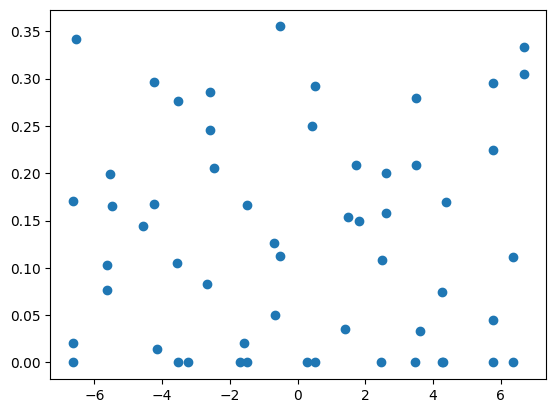

In [10]:
import math

def logit(x):
    odds = x/(1-x)
    if (x/1-x) >= 1:
        odds -= 1e-10
    elif (x/1-x) <= 0:
        odds += 1e-9
    return math.log(odds)

fit_df = pd.read_csv('data/final_trial_df.csv')


features = ['TrgtPosLeftRight', 'TrgtPosMiddle', 'Trial', 'MsgColorShape', 'SimpleComplex', 'Unambiguous']
# code 3 conditions into 2 columns of binary values

code = [[ 1, -1],
        [-1, -1],
        [ 0,  2]]

simple_vs_complex = {'simple': 1, 'complex': -1, 'unambiguous': 0, 'strategy_simple': 1, 'strategy_complex': -1}
left_vs_right = [1, 0, -1]
color_vs_shape = {'color': 1, 'shape': -1}
fit_df['TrgtPosLeftRight'] = fit_df['TargetPosition'].apply(lambda x: left_vs_right[x])
fit_df['TrgtPosMiddle'] = fit_df['TargetPosition'].apply(lambda x: 2 if x == 1 else -1)
fit_df['MsgColorShape'] = fit_df['MsgType'].map(color_vs_shape)
fit_df['SimpleComplex'] = fit_df['Condition'].map(simple_vs_complex)
fit_df['Unambiguous'] = fit_df['Condition'].apply(lambda x: 2 if x == 'unambiguous' else -1)
fit_df['PropTimeOnAvailableMsgsLog'] = fit_df['PropTimeOnAvailableMsgs'].apply(lambda x: logit(x))
fit_df['Trial'] = fit_df['Trial']-fit_df['Trial'].median()

x = fit_df[features]
y = fit_df['PropTimeOnAvailableMsgs']

fit_df[['PropTimeOnAvailableMsgsLog', 'PropTimeOnAvailableMsgs']].head()

# apply pca and report the explained variance
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# plot first principal component against target variable
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)
plt.scatter(x_pca, y)



In [25]:

# fit linear regression and report correlation of features to target
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

coefs = np.array([features, reg.coef_]).T
print(reg.score(x, y))
print(coefs)

# # plot feature and mmodel predictions for each feature
# for feature in features:
#     plt.figure()
#     sns.scatterplot(x=fit_df[feature], y=fit_df['PropTimeOnAvailableMsgs'])
#     sns.lineplot(x=fit_df[feature], y=y_pred)


0.09889705347121003
[['TrgtPosLeftRight' '0.195964094506491']
 ['TrgtPosMiddle' '0.26409713334823387']
 ['Trial' '-0.07364645705117706']
 ['MsgColorShape' '0.09706406755204097']
 ['SimpleComplex' '-0.3035098453421854']
 ['Unambiguous' '-0.3594961067937925']]


                Subject  Trial    Condition  Correct  AnswerTime  \
0  iza_test3_11february   -6.5  unambiguous        1        9108   
1  iza_test3_11february   -5.5  unambiguous        1        2977   
2  iza_test3_11february   -4.5      complex        1       10220   
3  iza_test3_11february   -3.5      complex        1        5943   
4  iza_test3_11february   -2.5      complex        1       13538   

   PropTimeOnSentMsg  PropTimeOnTrgt  PropTimeOnDist  PropTimeOnComp  \
0           0.059259        0.133333        0.251852        0.251852   
1           0.461538        0.000000        0.230769        0.076923   
2           0.026316        0.157895        0.184211        0.184211   
3           0.170213        0.085106        0.382979        0.276596   
4           0.077922        0.000000        0.000000        0.636364   

   PropTimeOnAvailableMsgs  PropTimeOnNonAOI  TargetPosition MsgType  \
0                 0.170370          0.133333               0   shape   
1             

/home/gatemrou/venvs/ml2024/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/home/gatemrou/venvs/ml2024/lib/python3.12/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


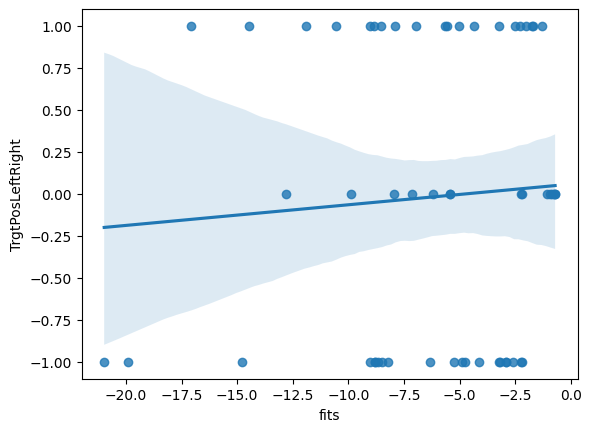

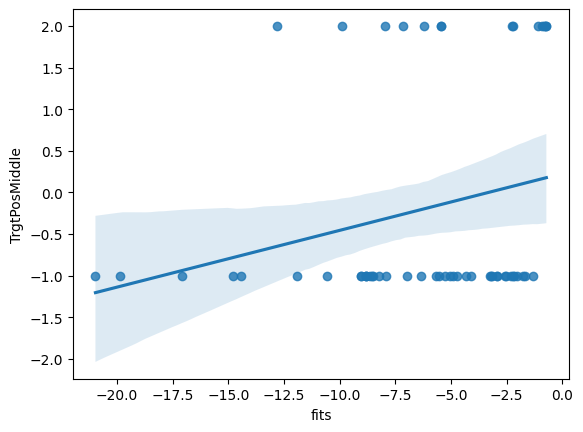

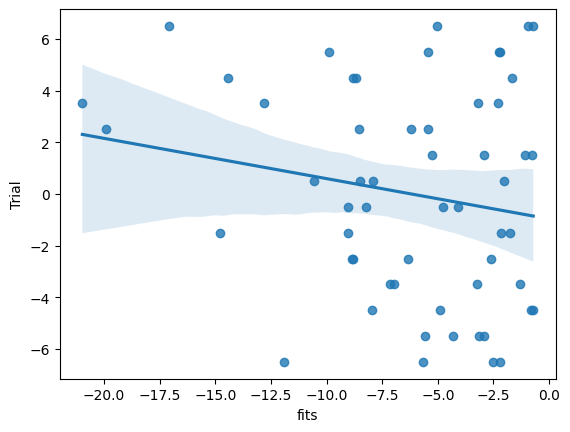

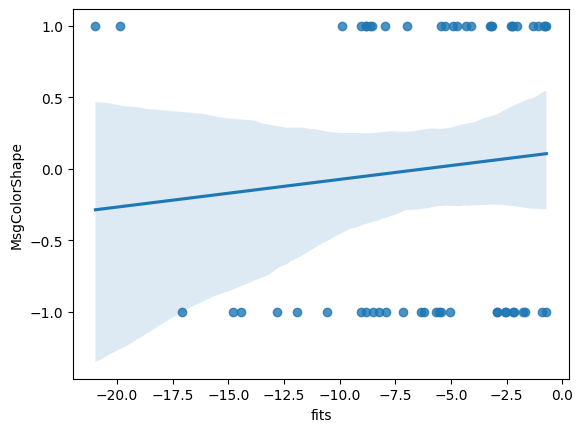

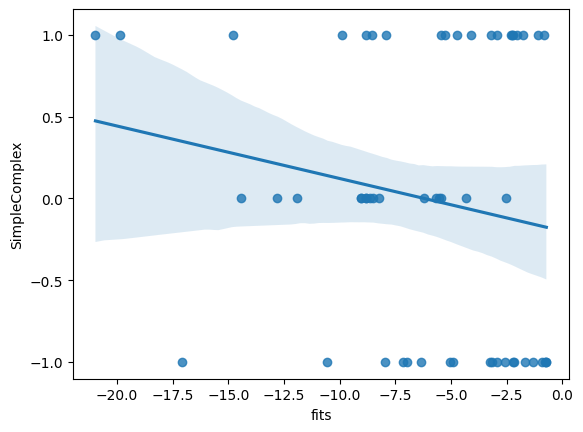

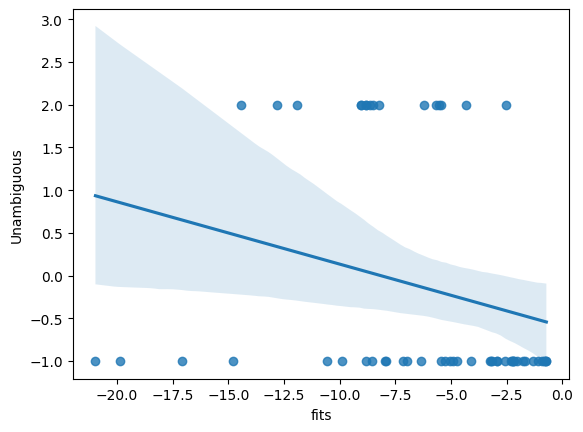

In [ ]:

from pymer4.models import Lmer

print(fit_df.head())
reg = Lmer('PropTimeOnAvailableMsgsLog ~ TrgtPosLeftRight + TrgtPosMiddle + MsgColorShape + SimpleComplex + Unambiguous + Trial + (1 + TrgtPosLeftRight + TrgtPosMiddle + SimpleComplex + Unambiguous + Trial|Subject)', data=fit_df)
print(reg.fit())

# plot feature and model predictions for each feature
for feature in features:
    plt.figure()
    sns.regplot(x='fits', y=feature, data=reg.data, fit_reg=True)



In [19]:
# print(sum([df['propTimeOnNonAOIUnambiguous'].mean(), df['propTimeOnSentMsgUnambiguous'].mean(), df['propTimeOnTrgtUnambiguous'].mean(), df['propTimeOnDistUnambiguous'].mean(), df['propTimeOnCompUnambiguous'].mean()], df['propTimeOnAvailableMsgsUnambiguous'].mean()))
print(df['propTimeOnTrgtComplex'].mean(), df['propTimeOnTrgtSimple'].mean(), df['propTimeOnTrgtUnambiguous'].mean(), df['propTimeOnTrgt'].mean())
# df[['propTimeOnTrgtComplex', 'propTimeOnTrgtSimple', 'propTimeOnTrgtUnambiguous', 'propTimeOnTrgt']]

0.3276323273751244 0.15332341063343208 0.14917432029904992 0.2116451694131535


In [15]:
df = pd.read_csv(f'data/preprocessed_data/{df_name}.csv')
df['coordinates'] = df['coordinates'].apply(lambda x: json.loads(x))
df['gaze'] = df['gaze'].apply(lambda x: json.loads(x))

def gen_plot(workerid, trial_id, gaze, coords, trgt_pos, comp_pos, condition, correct):
    try:
        window_resolution = [coords['img1']['x'] + coords['img3']['x'] + coords['img3']['width'], 
                            2*coords['img1']['y'] + coords['img1']['height']]
    except:
        print(coords)
    imgs = ['img1', 'img2', 'img3', 'sent_msg', 'available_msgs']
    x, y = [], []
    x = np.array([val['x'] for val in gaze.values()])
    y = np.array([val['y'] for val in gaze.values()])
    plt.figure(figsize=(window_resolution[0]*6/window_resolution[1], 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], color=(0, 0, i/len(x)), marker='o')
    plt.xlim(0, window_resolution[0])
    plt.ylim(0, window_resolution[1])
    for i, area in enumerate(imgs):
        cur_coords = coords[area]
        x_min = max(0, cur_coords['x'])
        x_max = cur_coords['x'] + cur_coords['width']
        y_min = max(0, cur_coords['y'])
        y_max = cur_coords['y'] + cur_coords['height']
        # plot boxes that mark images
        color = (1, 0, 0)
        if trgt_pos == i:
            color = (0, 1, 0)
        elif comp_pos == i:
            color = (1, 1, 0)
        elif area == 'sent_msg':
            color = (0, 1, 1)
        elif area == 'available_msgs':
            color = (1, 0, 1)
        plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], linewidth=3, color=color)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.tight_layout()
    os.makedirs(f'data/gaze_plots/pilot/{condition}/{correct}/{workerid}/', exist_ok=True)
    # resize output image to 400x400 before saving
    plt.savefig(f'data/gaze_plots/pilot/{condition}/{correct}/{workerid}/{workerid}_{condition}_{trial_id}_{correct}.png', bbox_inches="tight", transparent=True, pad_inches=0)
    plt.close()

df.apply(lambda x: gen_plot(x['workerid'], x['userTrialId'], x['gaze'], x['coordinates'], x['trgtPos'], x['compPos'], x['condition'], x['correct']), axis=1)


0      None
1      None
2      None
3      None
4      None
       ... 
375    None
376    None
377    None
378    None
379    None
Length: 380, dtype: object

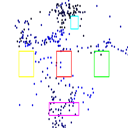

In [ ]:
from PIL import Image

img = Image.open('/home/gatemrou/uds/thesis/Thesis-Project/analysis/data/gaze_plots/tests/complex/0/j/j_complex_1_0.png', 'r')
img.resize((128, 128))

##  Leaderboard

In [45]:
leaderboard_df = df.sort_values(by='meanAnswerTime').sort_values(by='answerAccuracy', ascending=False, kind='stable')[['workerid', 'answerAccuracy', 'meanAnswerTime']].drop_duplicates().reset_index(drop=True)
leaderboard_df.index += 1
pp.pprint(leaderboard_df)

                   workerid  answerAccuracy  meanAnswerTime
1  671a528fe9658f0a32bd55ce        0.973684     6399.842105
2  66855ff6755a311dada39b28        0.973684     6799.552632
3  5ed367525fe8eb2fa817b9c1        0.921053     6825.736842
4  6037919c2b5de32d6ebaee90        0.868421     4130.026316
5  661e75b62240d5ad7b18a9a6        0.842105     3344.184211
6  665d5a08c8e61c18498d08c9        0.815789     4285.578947
7  677dc096791809f5e6c196a9        0.789474     3731.131579
8  60bf706fc3b12a3c4f11a487        0.763158     3390.552632
9  676942464fe51377822349c7        0.710526    14601.052632


5ed367525fe8eb2fa817b9c1
{   'browser': 'Chrome',
    'browserMajorVersion': 133,
    'browserVersion': '133.0.0.0',
    'mobile': False,
    'os': 'Windows',
    'osVersion': '10',
    'screen': '1920 x 1080'}
[88, 69, 72]
0 simple


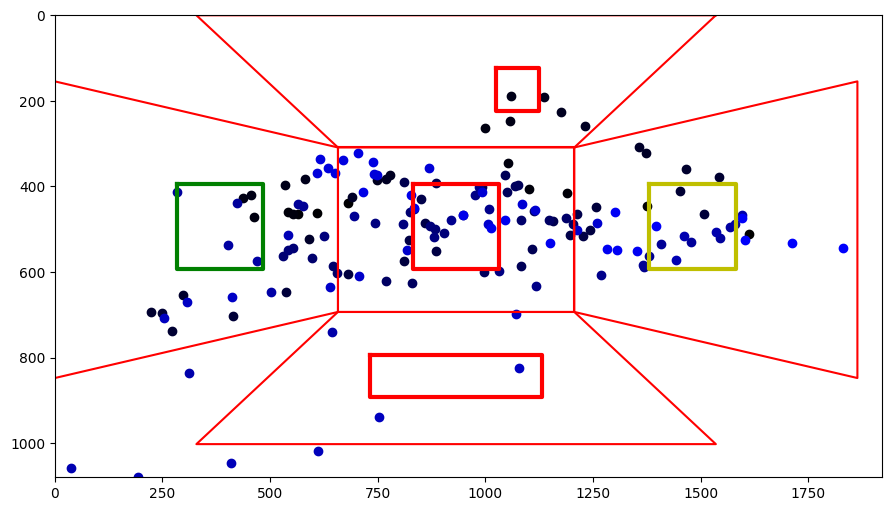

1 simple


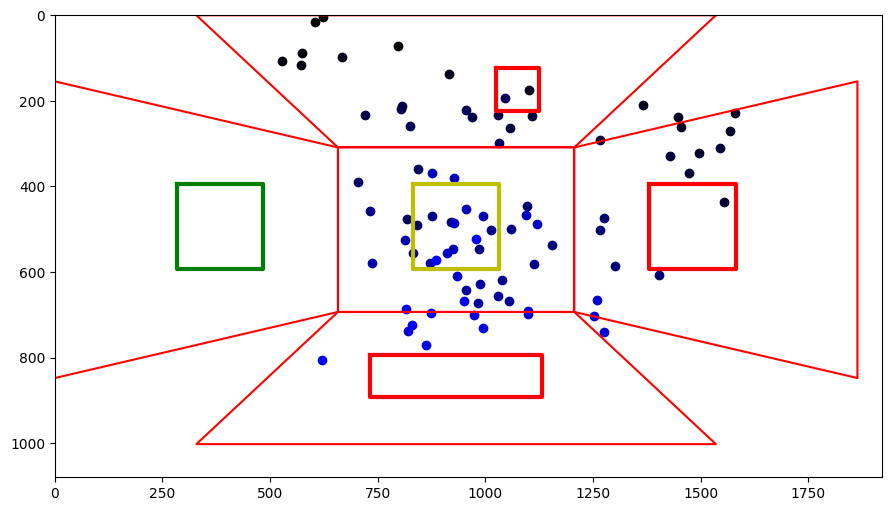

2 unambiguous


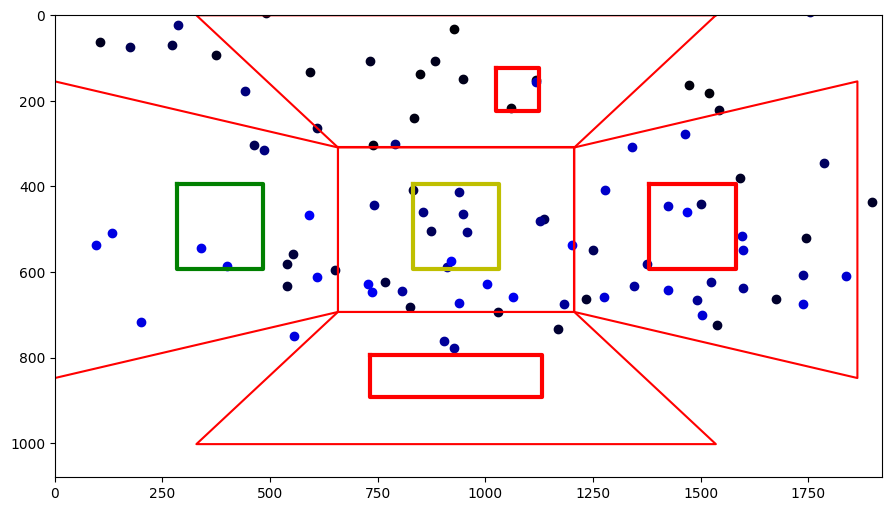

3 complex


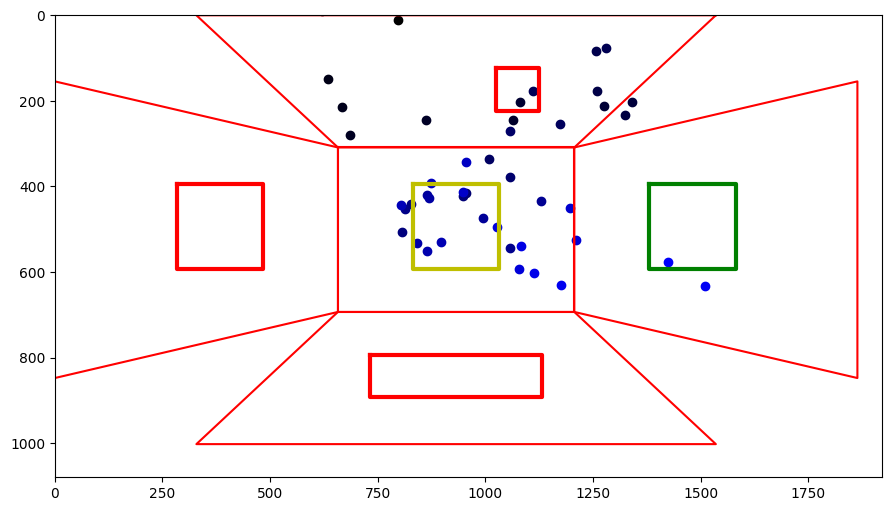

4 simple


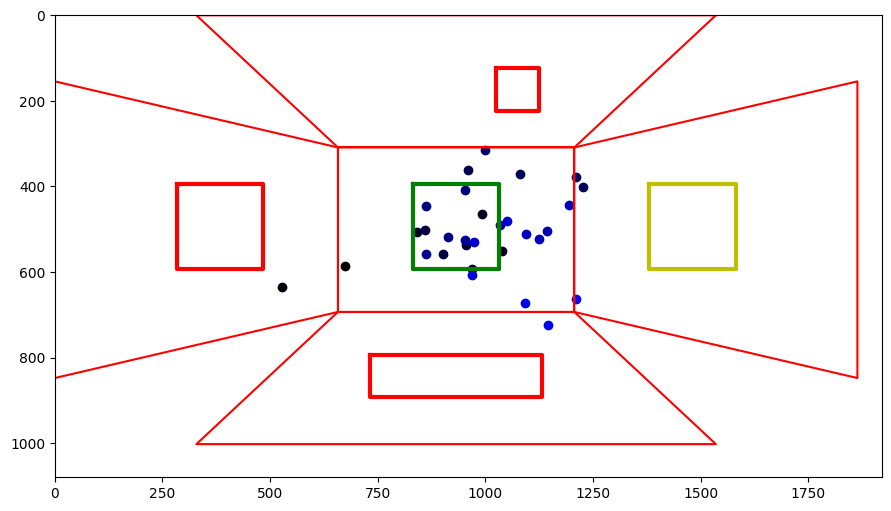

5 unambiguous


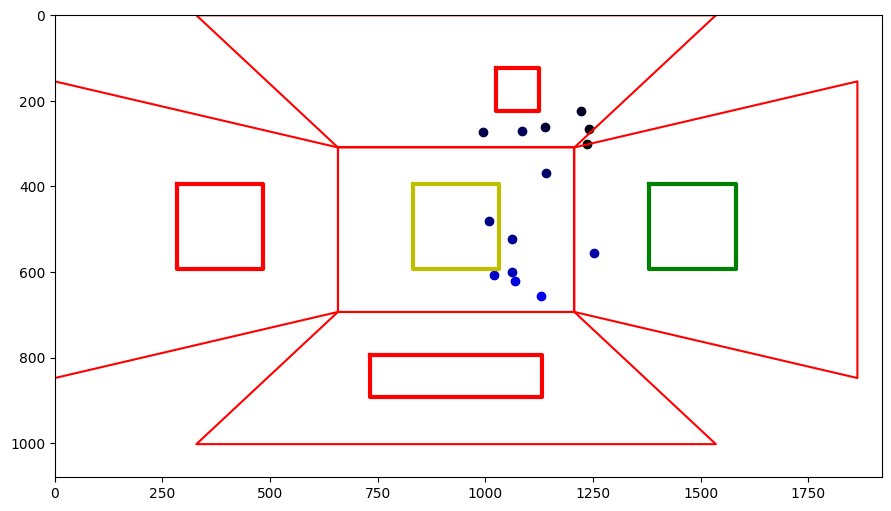

6 simple


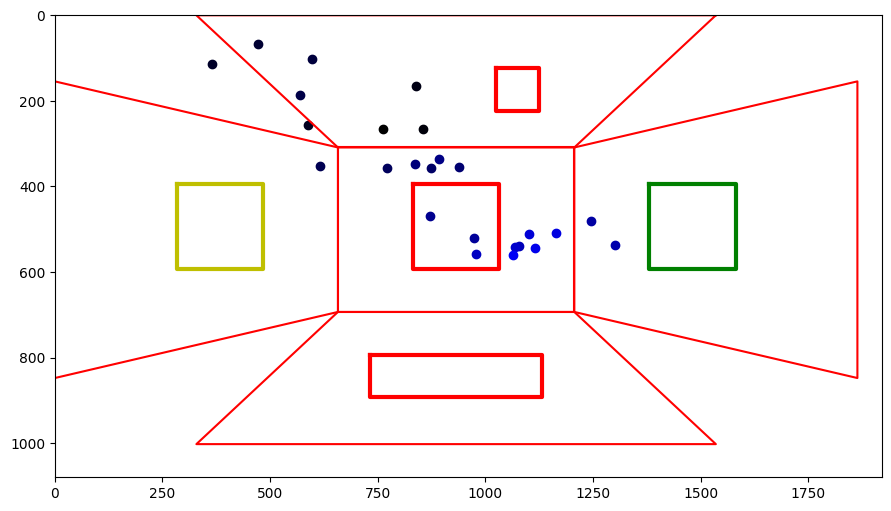

7 unambiguous


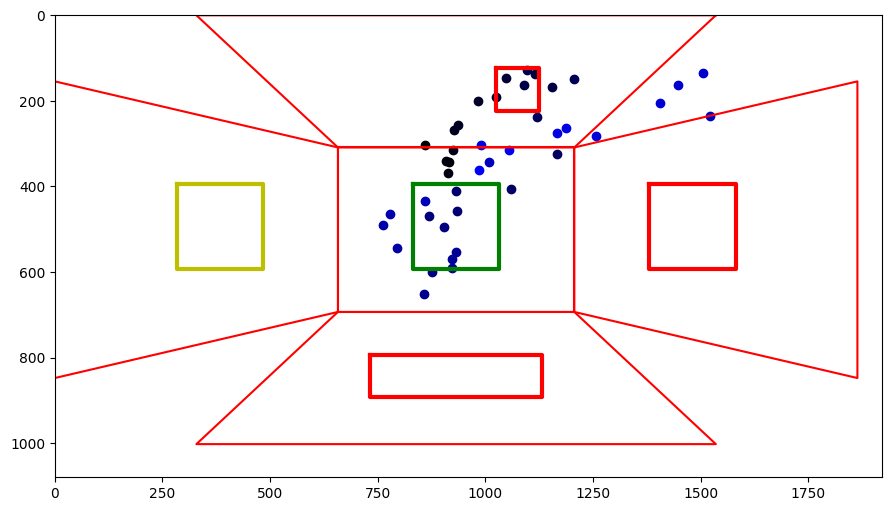

8 unambiguous


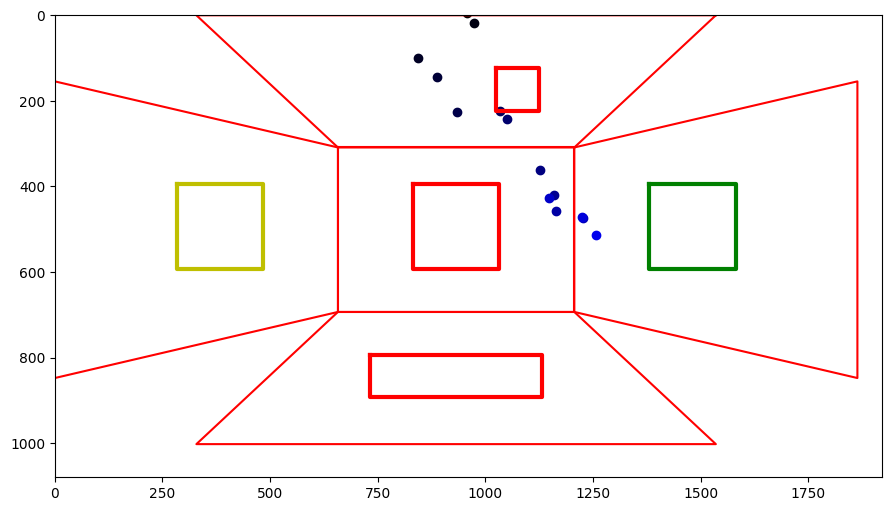

9 simple


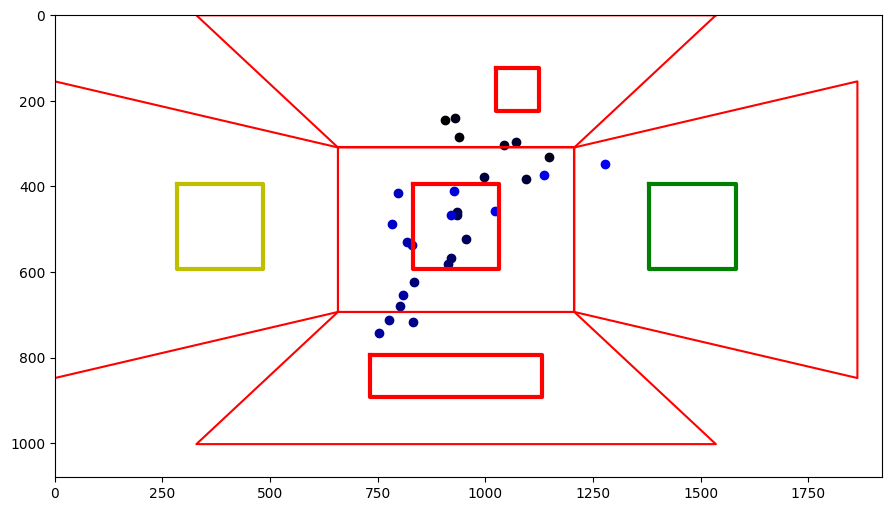

10 complex


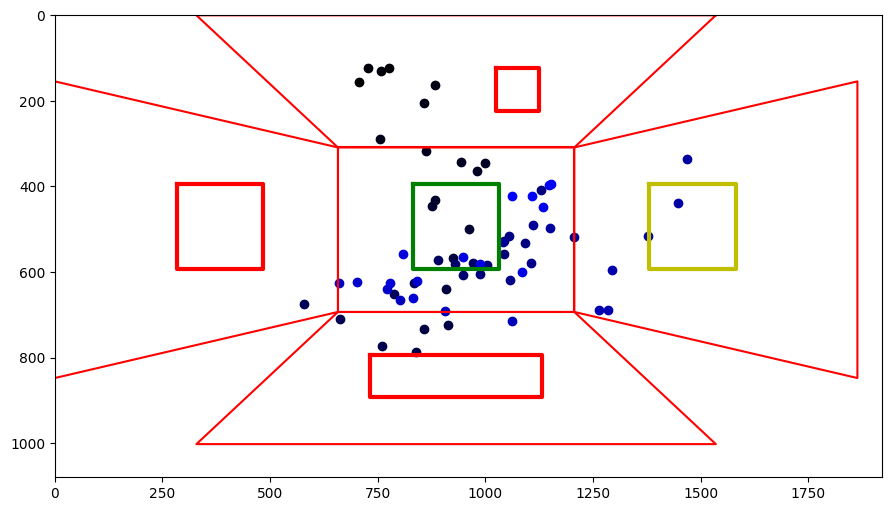

11 complex


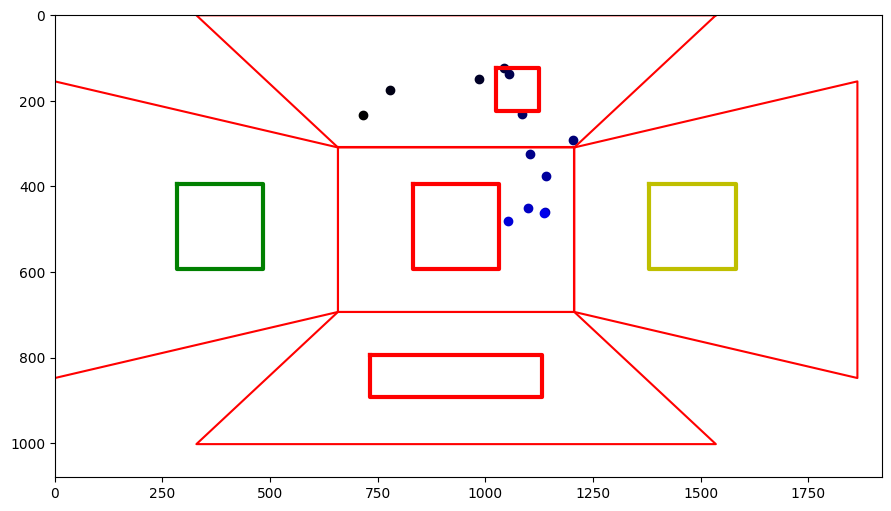

12 unambiguous


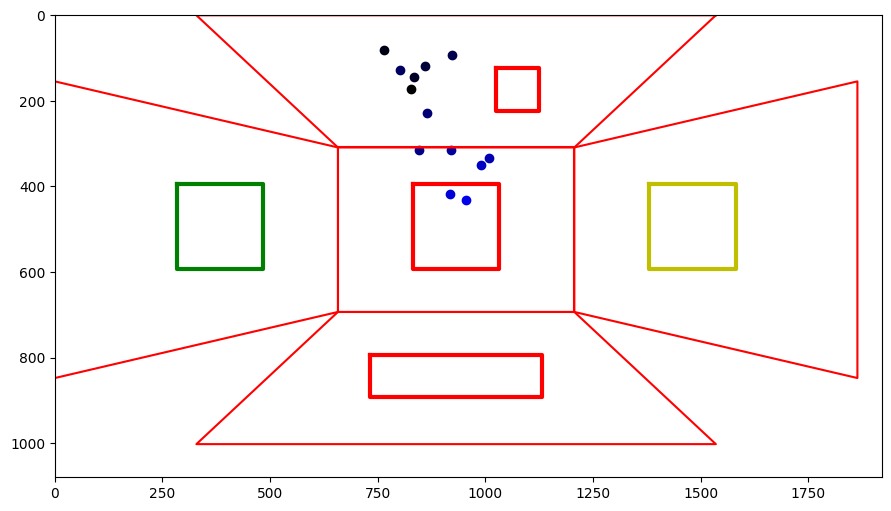

13 unambiguous


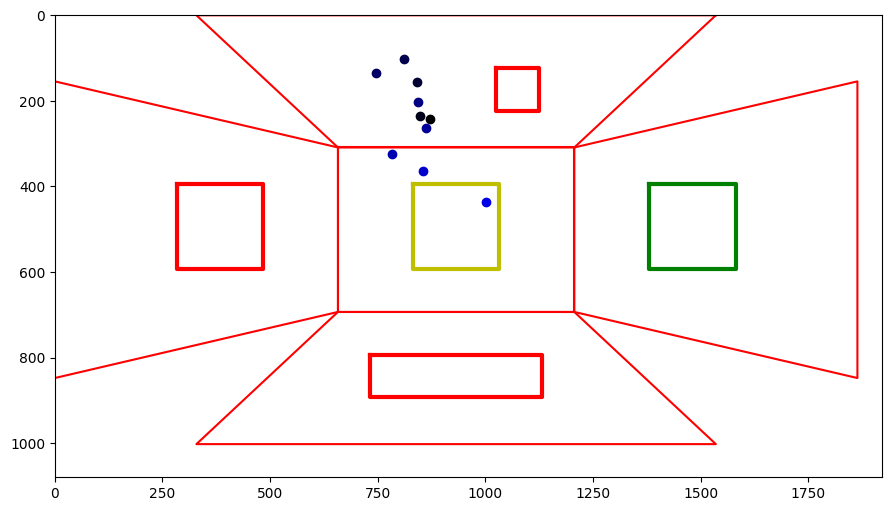

14 complex


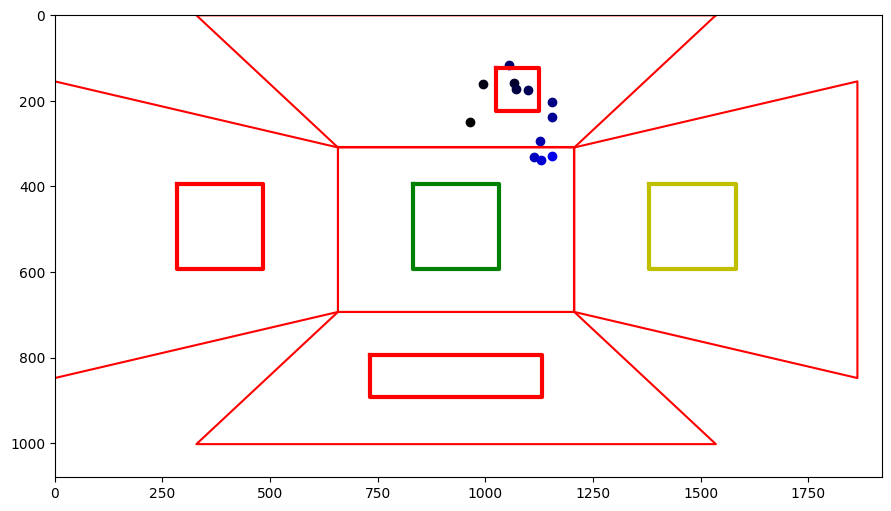

15 unambiguous


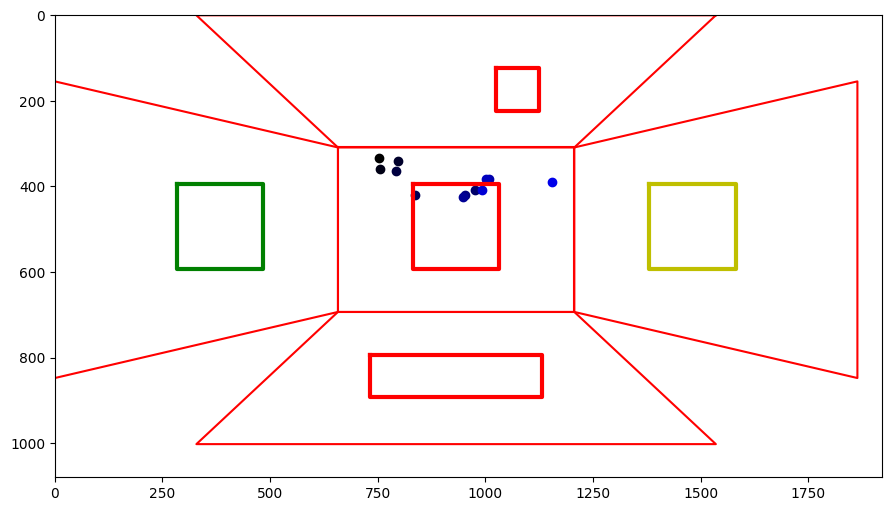

16 complex


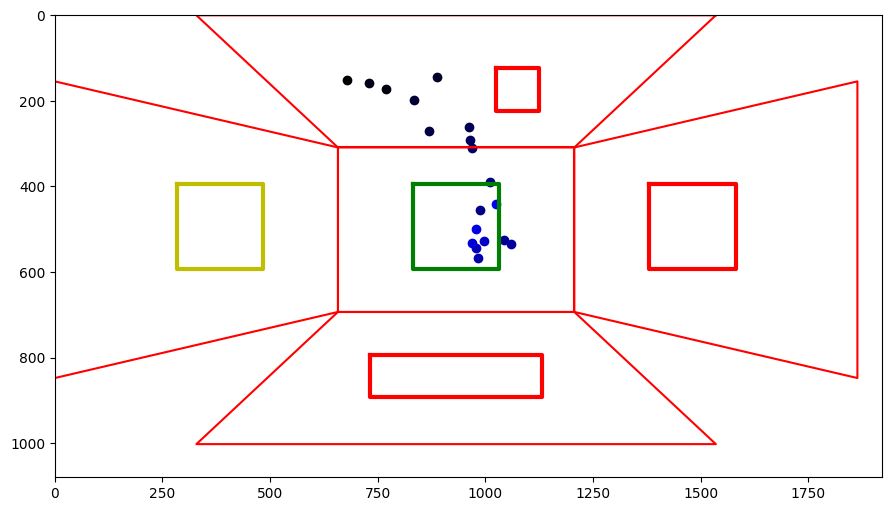

17 unambiguous


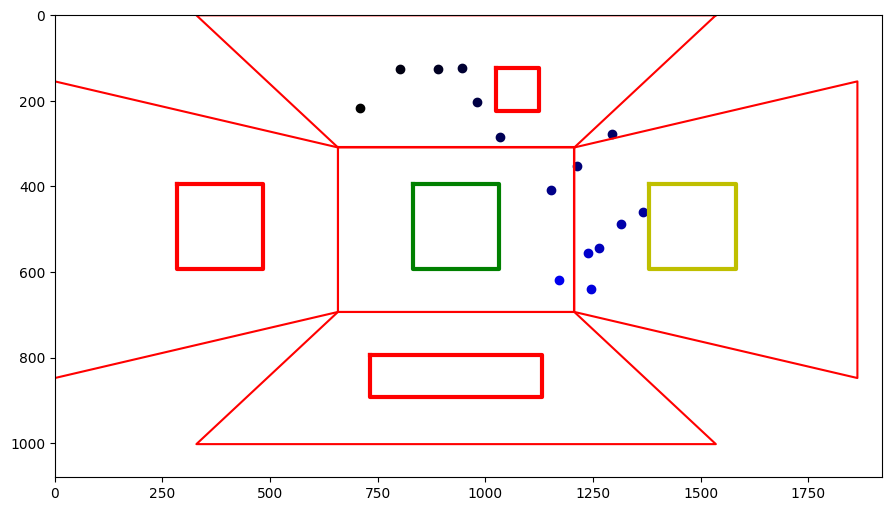

18 complex


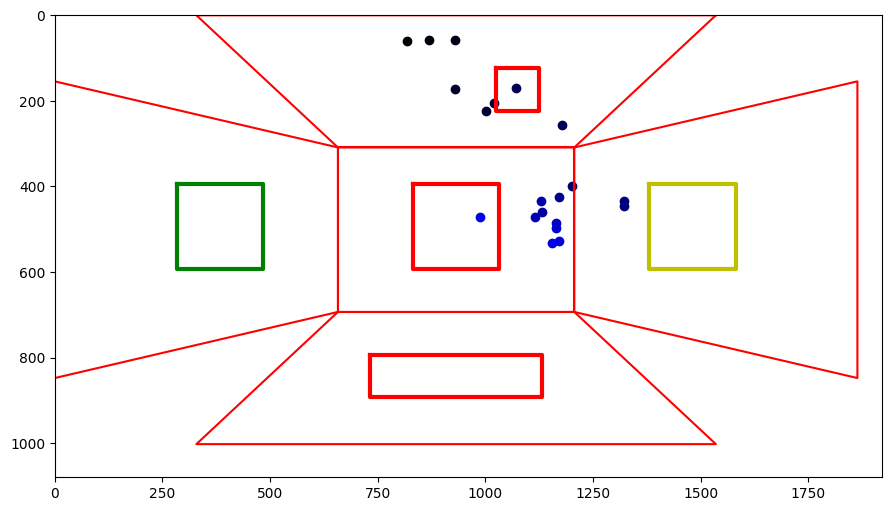

19 complex


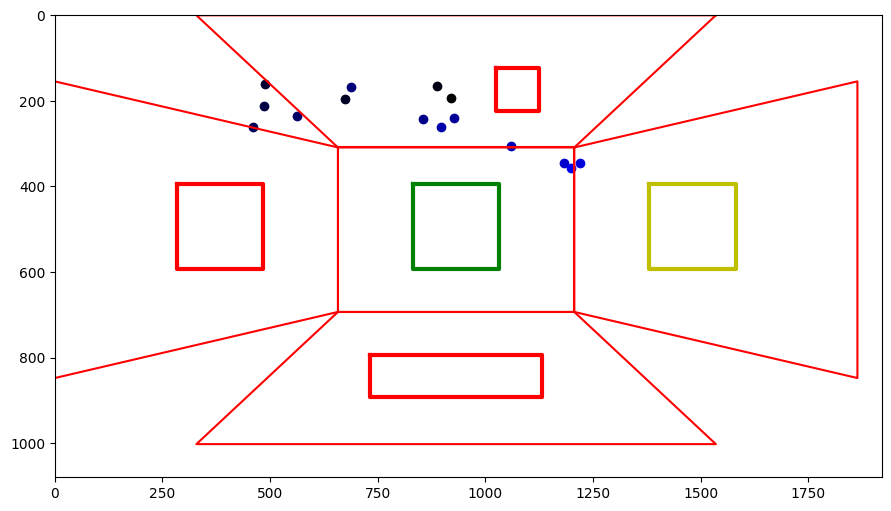

20 complex


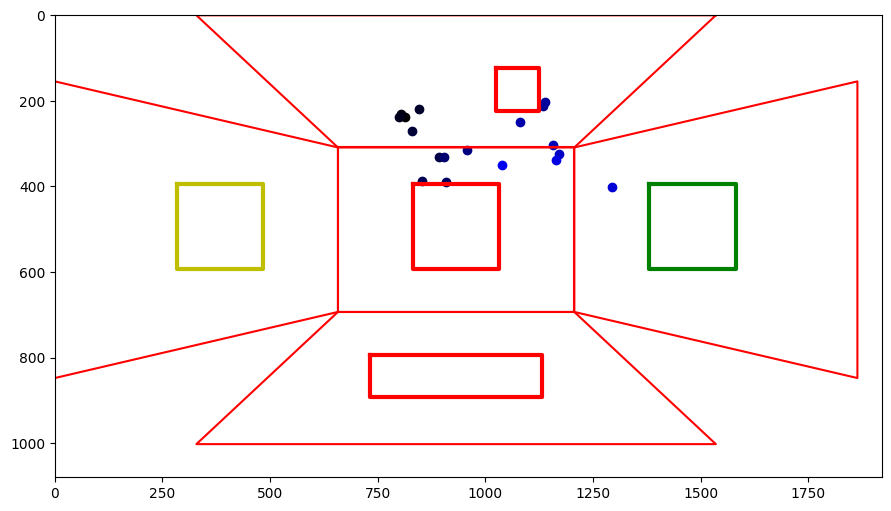

21 simple


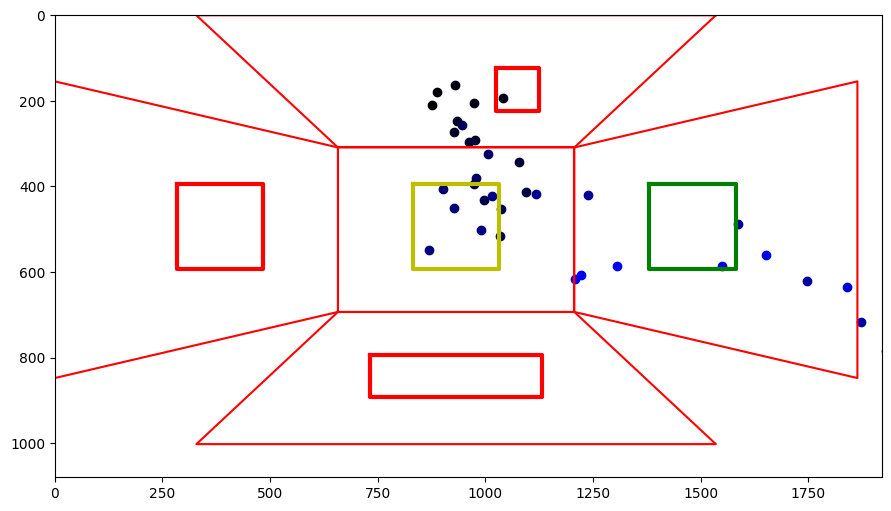

22 simple


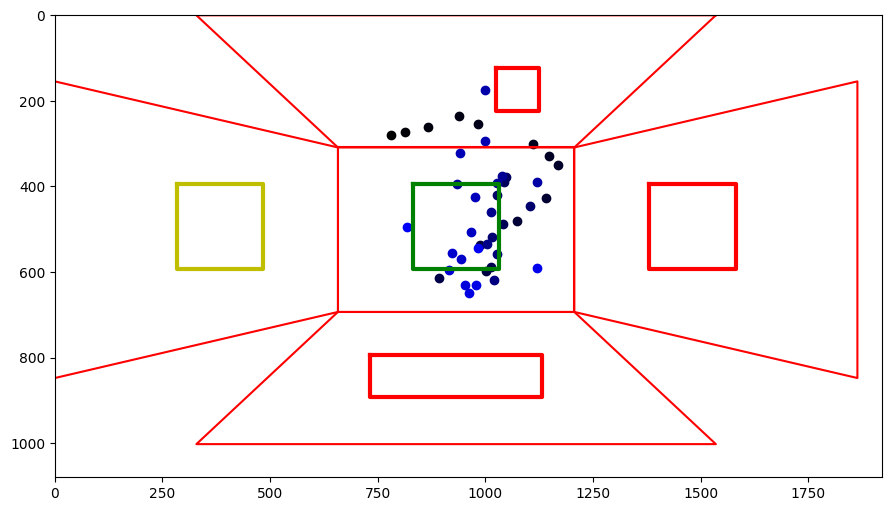

23 simple


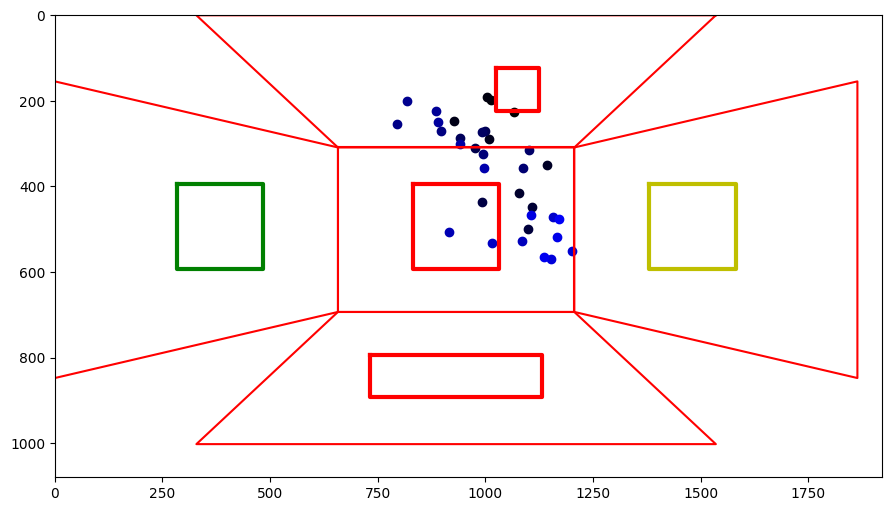

24 simple


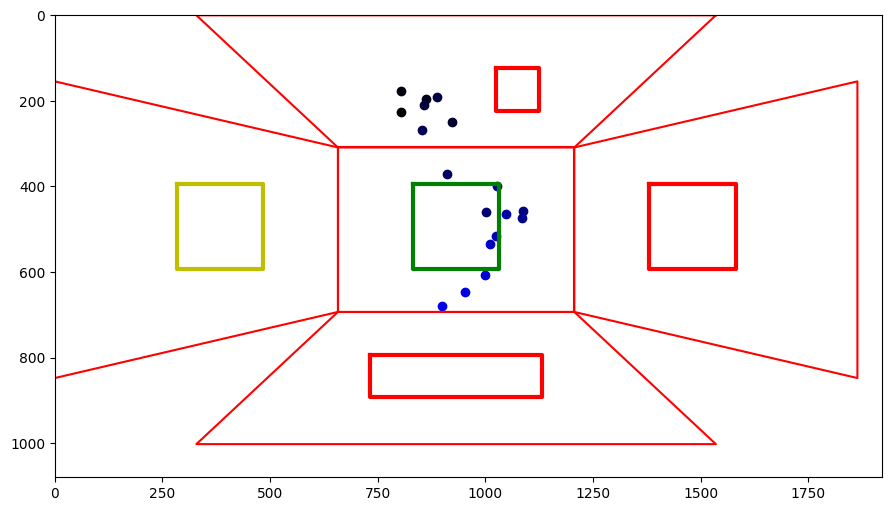

25 simple


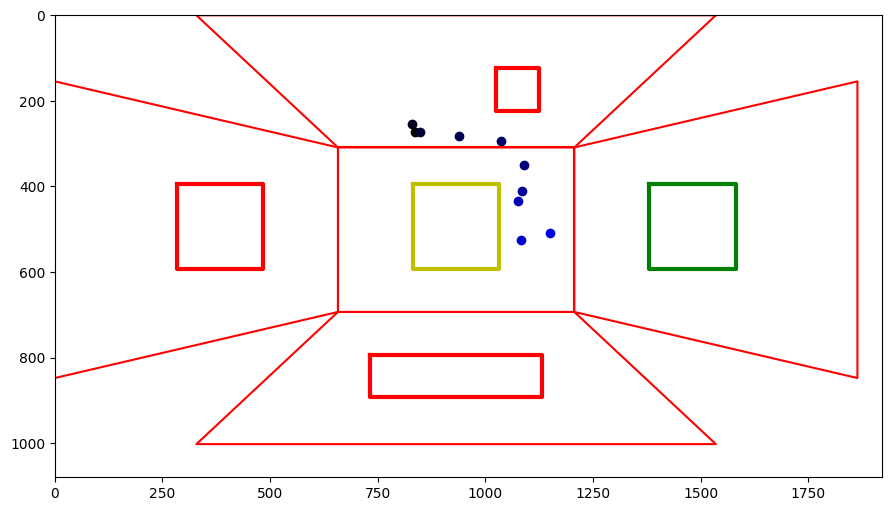

26 complex


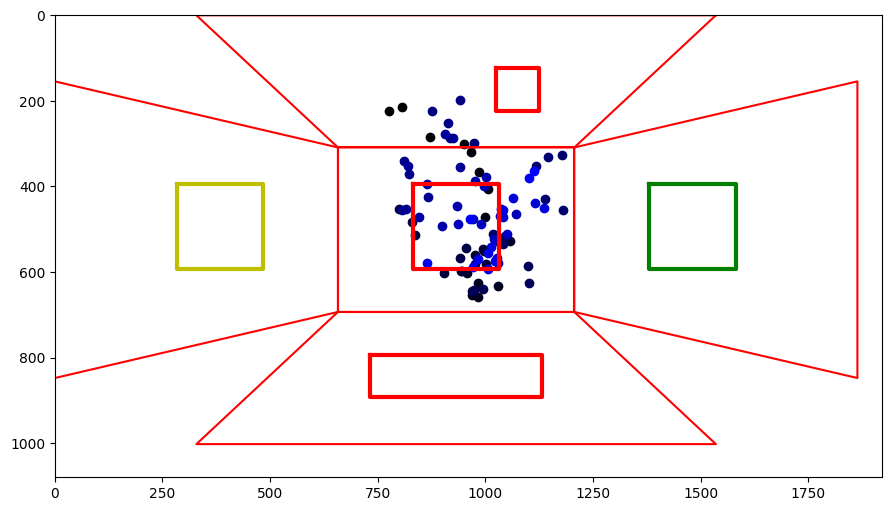

27 complex


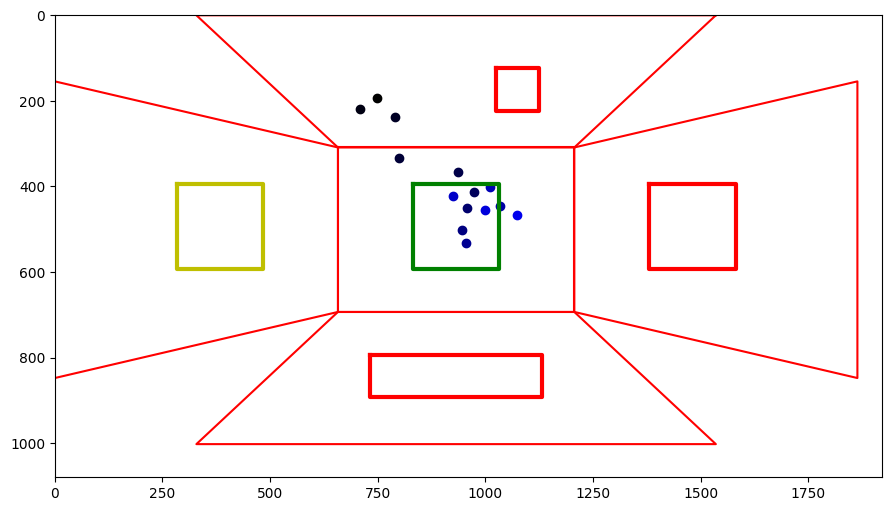

28 unambiguous


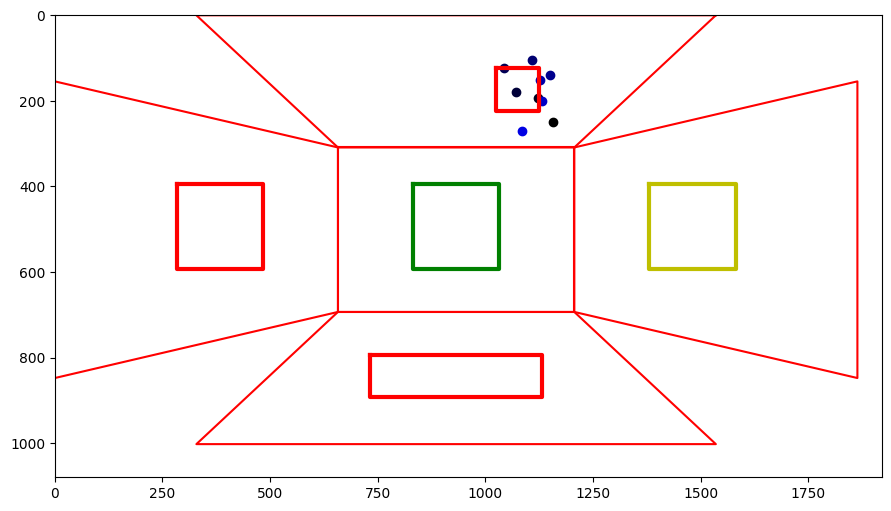

29 simple


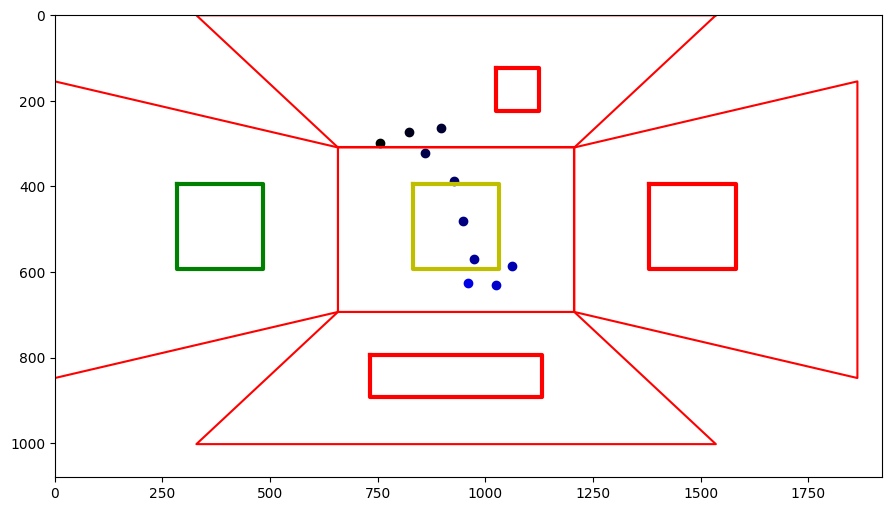

30 simple


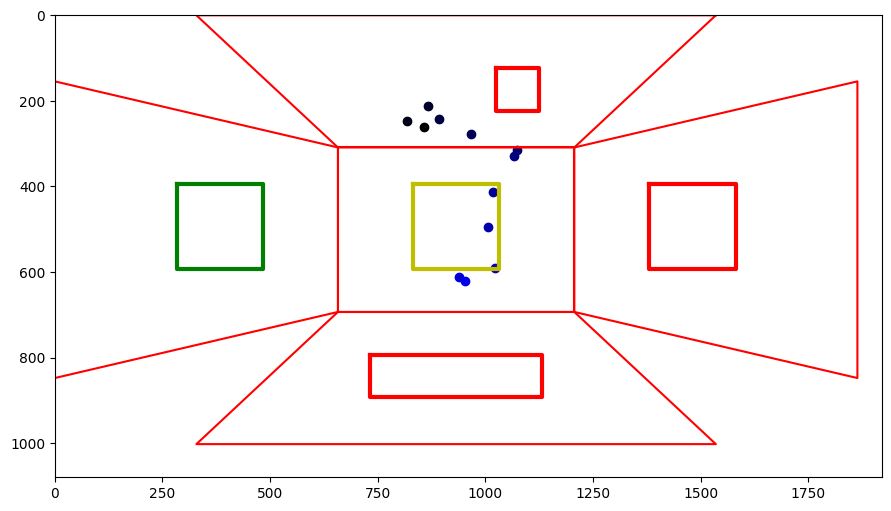

31 complex


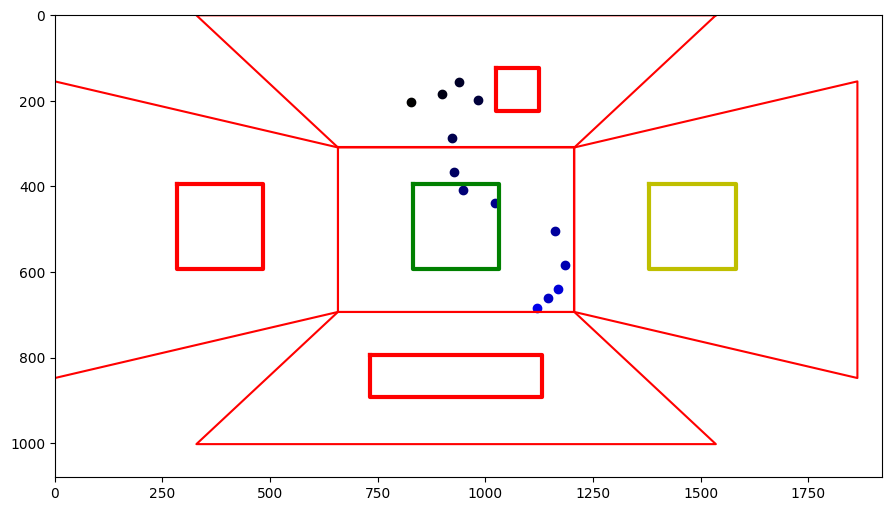

32 unambiguous


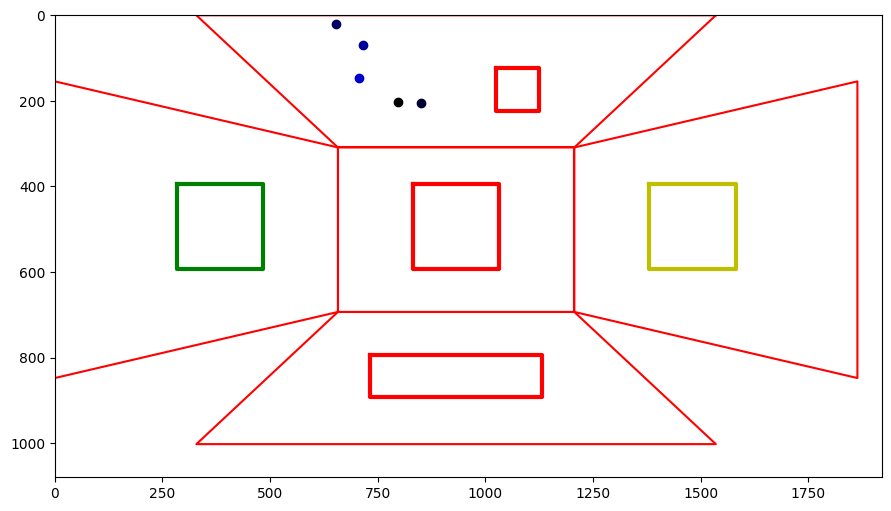

33 complex


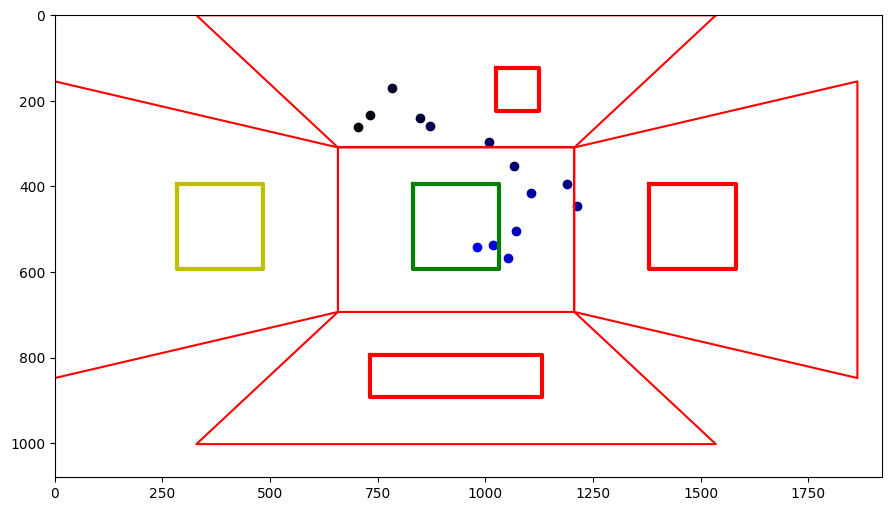

34 unambiguous


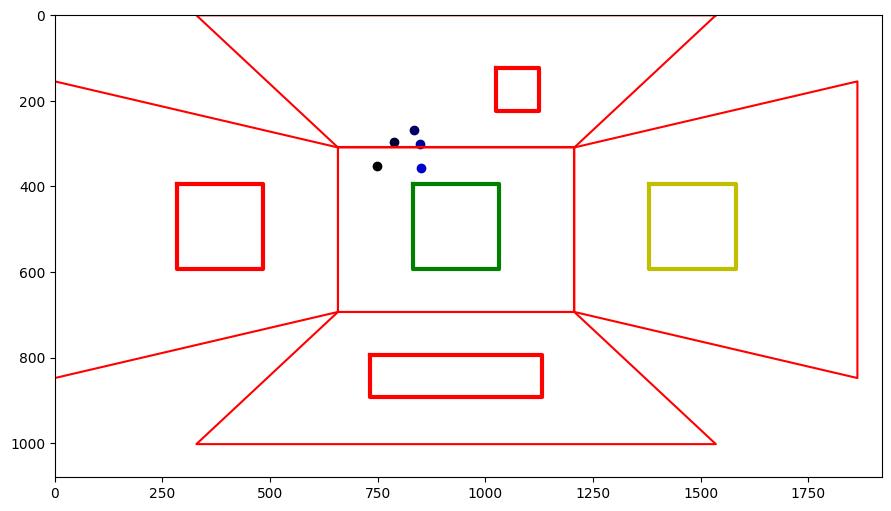

35 unambiguous


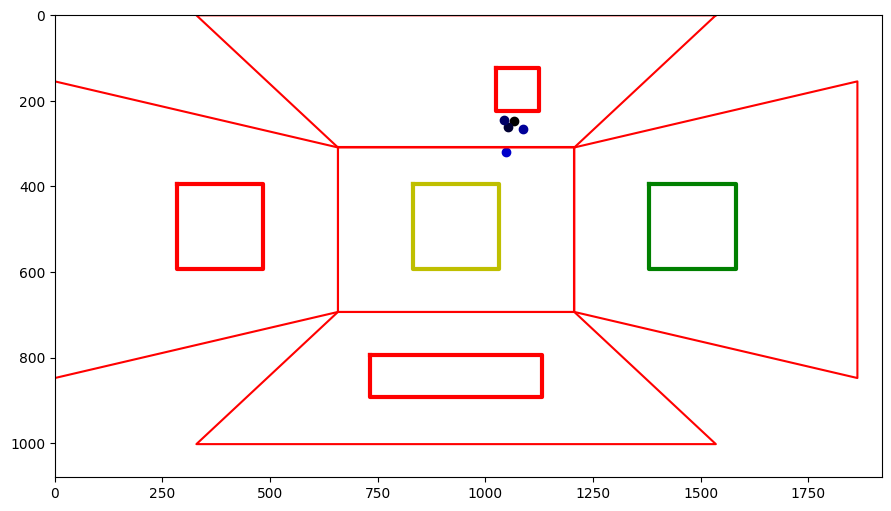

36 strategy_simple


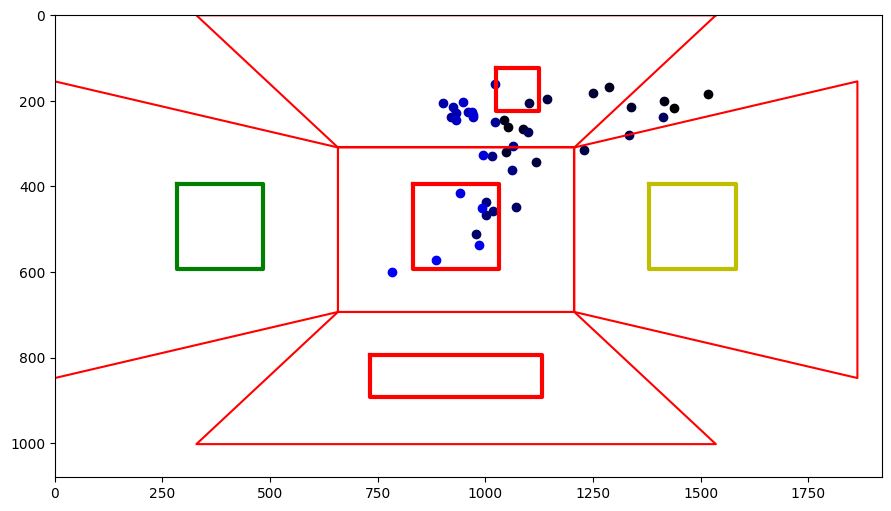

37 strategy_complex


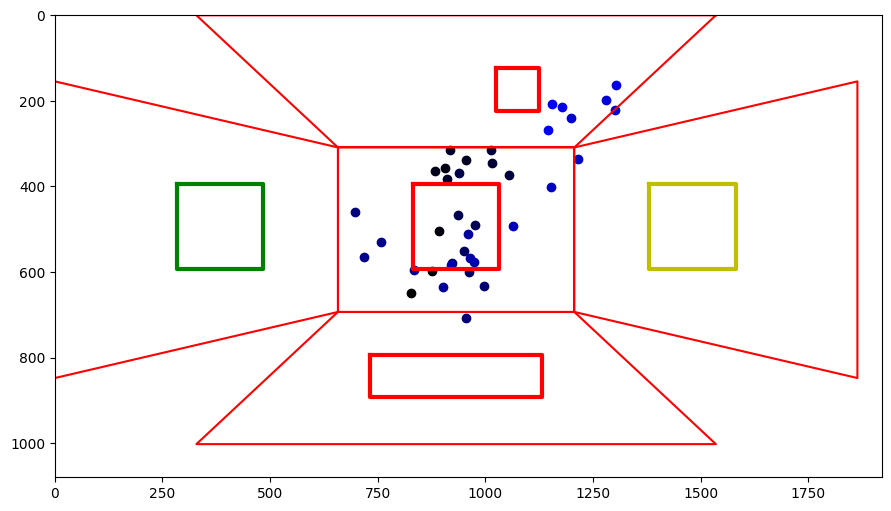

In [46]:
participant = df['workerid'].unique()[0]
print(participant)
sample = df[df['workerid']==participant]
pp.pprint(sample.iloc[0].deviceInfo)
pp.pprint(sample.iloc[0].calibrationPrecision)
resolution = sample.iloc[0].resolution

def plot_polygons(coords, plot):
    aoi = ['sent_msg', 'img1', 'img2', 'img3', 'available_msgs']
    for polygon_type in aoi:
        polygon = compute_polygon(polygon_type, coords)
        x,y = polygon.exterior.xy
        plot.plot(x, y, 'r')
        
aoi = ['img1', 'img2', 'img3', 'sent_msg', 'available_msgs']

for i in range(len(sample)):
    cur_sample = sample.iloc[i]
    gaze_sample = None
    gaze_sample = cur_sample.gaze
    x, y = [], []
    x = np.array([g['x'] for g in gaze_sample.values()])
    y = np.array([g['y'] for g in gaze_sample.values()])
    # print(len(x))
    # print(cur_sample.answerTime)
    print(i, cur_sample.type)
    # make a scatterplot on the left and a heatmap on the right, keep proportions of the screen
    
    # fig, axs = plt.subplots(1, 2, figsize=(2.2*(resolution[0]*6/resolution[1]), 6))
    plt.figure(figsize=(resolution[0]*6/resolution[1], 6))

    # make every next point slightly hue color on the plot to represent a scanpath
    for i in range(len(x)):
        plt.plot(x[i], y[i], color=(0, 0, i/len(x)), marker='o')


    plt.xlim(0, resolution[0])
    plt.ylim(0, resolution[1])
    plt.gca().invert_yaxis()


    plot_polygons(cur_sample.coordinates, plt)
    for i, area in enumerate(aoi):
        cur_coords = cur_sample.coordinates[area]
        x_min = max(0, cur_coords['x'])
        x_max = cur_coords['x'] + cur_coords['width']
        y_min = max(0, cur_coords['y'])
        y_max = cur_coords['y'] + cur_coords['height']
        # plot boxes around AOI
        color = 'r'
        if cur_sample.trgtPos == i:
            color = 'g'
        if cur_sample.compPos == i:
            color = 'y'
        plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], color=color, linewidth=3)

    plt.show()

